Weight memory where the readout isn't exactly the home vector, but activity that is shifted towards the home vector in relation to the current heading, so it represents a turn direction instead of how much to turn.

It kind of works, but when the memory is very flat, the current heading bump doesn't get shifted much and the memory readout is more or less always what the current head direction already is. The steering doesn't kick in until we're quite a bit away from home. This means that the search pattern is very large.

In [2]:
%load_ext autoreload
%autoreload 2
import json
import matplotlib.pyplot as plt
import matplotlib.colors as clr
import numpy as np
from loguru import logger
logger.remove()

from pim.simulator import SimulationExperiment
from pim.cx import fit_cpu4, to_cartesian

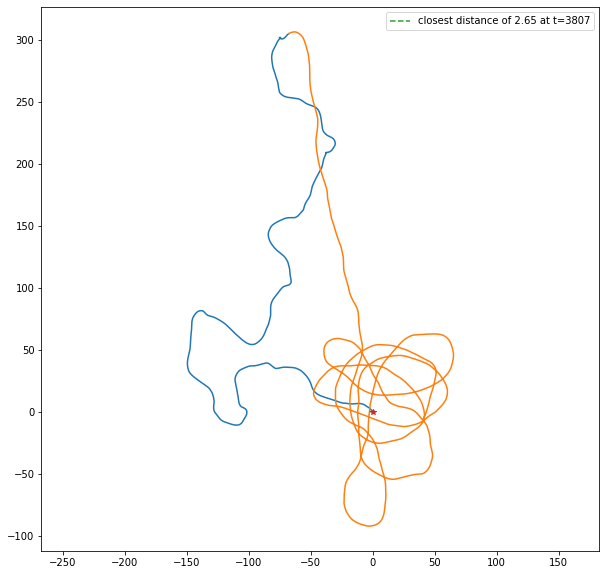

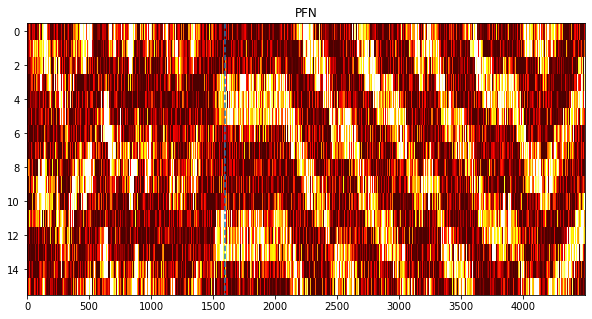

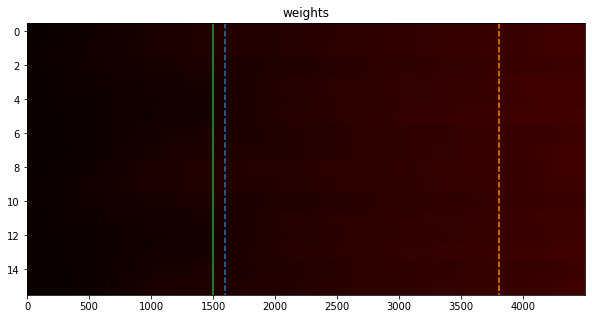

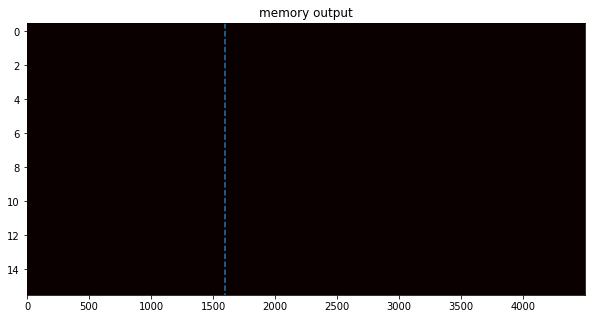

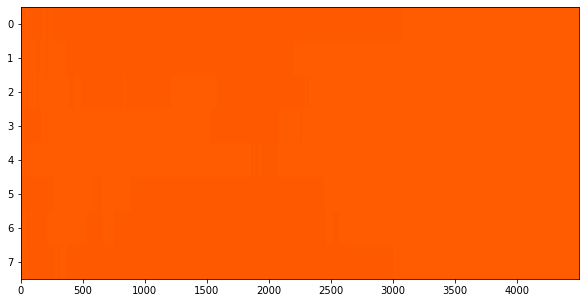

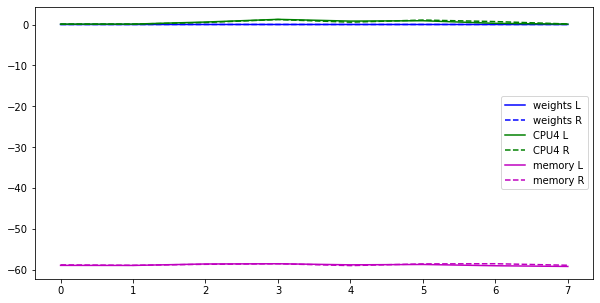

In [7]:
### THIS WORKS WELL FOR THEORY MOTOR USING LINEAR DYES. 0.01 * dt ###
parameters = {
    "type": "simulation",
    "T_outbound":1500,
    "T_inbound": 3000,
    "min_homing_distance": 300,
    "motor_factor": 0.1,
    "seed": 42,
    "record": ["memory", "TB1", "Pontine", "motor", "theory", "CPU4"],
    "cx": {
        "type": "dye",
        "output_layer": "theory",
        "params": {
            "noise": 0.1,
            "mem_initial": 0.0,
            "pfn_weight_factor": 2,
            "phi": 0.000015, ## unrealistic
            "beta": 0.1,
            "T_half": 13766.577568221355,
            "epsilon":2e5,
            "length": 1e-3,
            "c_tot": 0.3
        }
    }
}

# 2e5*1e-3*(0.3-c)=60

T = 1600

def timeline(t):
    plt.plot([t, t], [-0.5, 16-0.5], '--')

experiment = SimulationExperiment(parameters)
results = experiment.run("test")
t = results.closest_position_timestep()

# estimate positions:
decoded = np.array([to_cartesian(fit_cpu4(cpu4)) for cpu4 in results.recordings["memory"]["internal"]]) * 1500
decoded_pfn = np.array([to_cartesian(fit_cpu4(cpu4)) for cpu4 in results.recordings["memory"]["output"]]) * 1500

plt.figure(figsize=(10, 10))
ax = plt.axes()
ax.axis("equal")
results.plot_path(ax)

plt.legend()

weights = np.array(results.recordings["memory"]["internal"]).T
memory = np.array(results.recordings["memory"]["output"]).T
cpu4 = np.array(results.recordings["CPU4"]["output"]).T

plt.figure(figsize=(10, 5))
plt.imshow(cpu4, cmap="hot", interpolation="nearest", aspect="auto", norm=clr.Normalize(0, 1))
timeline(T)
plt.title("PFN")

fig = plt.figure(figsize=(10, 5))
plt.imshow(weights, cmap="hot", interpolation="nearest", aspect="auto", norm=clr.Normalize(0, 0.3))
timeline(T)
timeline(t)
plt.plot([parameters["T_outbound"], parameters["T_outbound"]], [-0.5, 16-0.5], '-')
plt.title("weights")

plt.figure(figsize=(10, 5))
plt.imshow(memory, cmap="hot", interpolation="nearest", aspect="auto", norm=clr.Normalize(0, 1))
timeline(T)
plt.title("memory output")

plt.figure(figsize=(10, 5))
plt.imshow(weights[:8,:] - weights[8:,:], cmap="hot", interpolation="nearest", aspect="auto", norm=clr.Normalize(-1, 1))
#timeline(T)

plt.figure(figsize=(10, 5))
plt.plot(weights[:8, T], "b-", label="weights L")
plt.plot(weights[8:, T], "b--", label="weights R")

plt.plot(cpu4[:8, T], "g-", label="CPU4 L")
plt.plot(cpu4[8:, T], "g--", label="CPU4 R")

plt.plot(memory[:8, T], "m-", label="memory L")
plt.plot(memory[8:, T], "m--", label="memory R")

plt.legend()
plt.show()

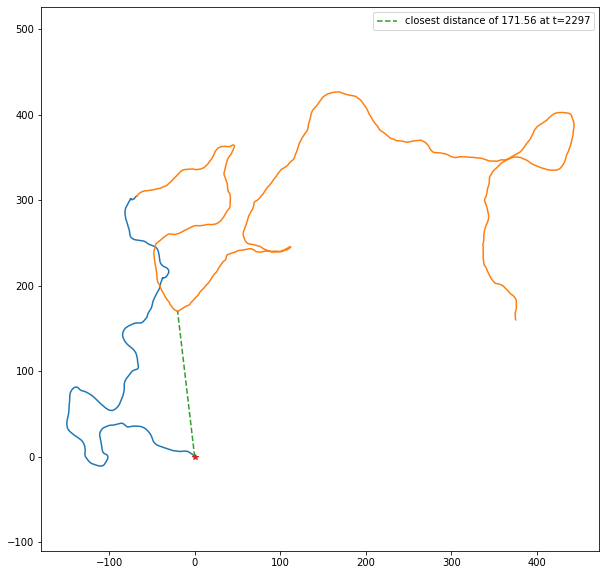

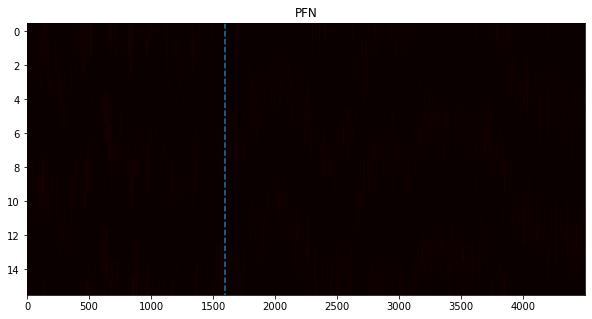

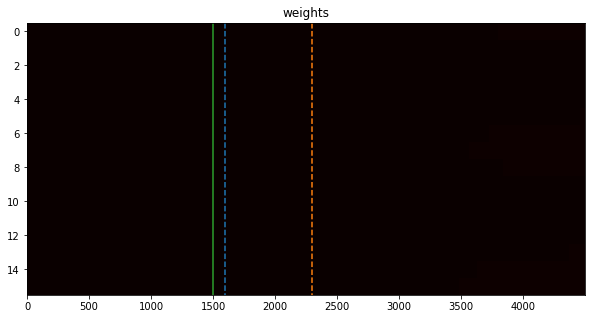

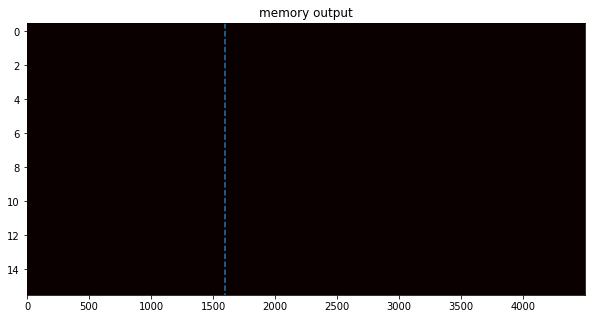

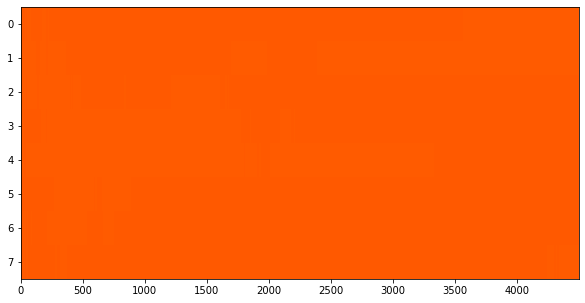

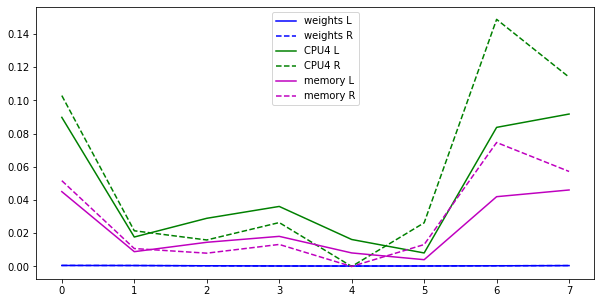

In [167]:
parameters = {
    "type": "simulation",
    "T_outbound":1500,
    "T_inbound": 3000,
    "min_homing_distance": 300,
    "motor_factor": 1,
    "seed": 42,
    "record": ["memory", "TB1", "Pontine", "motor", "theory", "CPU4"],
    "cx": {
        "type": "dye",
        "output_layer": "motor",
        "params": {
            "noise": 0.1,
            "mem_initial": 0.0,
            "pfn_weight_factor": 0.25,
            "phi": 0.000015,
            "beta": 1e-10,
            "T_half": 137665775682.21356,
            "epsilon":1e4,
            "length": 1e-4,
            "c_tot": 0.3
        }
    }
}

T = 1600

def timeline(t):
    plt.plot([t, t], [-0.5, 16-0.5], '--')

experiment = SimulationExperiment(parameters)
results = experiment.run("test")
t = results.closest_position_timestep()

# estimate positions:
decoded = np.array([to_cartesian(fit_cpu4(cpu4)) for cpu4 in results.recordings["memory"]["internal"]]) * 1500
decoded_pfn = np.array([to_cartesian(fit_cpu4(cpu4)) for cpu4 in results.recordings["memory"]["output"]]) * 1500

plt.figure(figsize=(10, 10))
ax = plt.axes()
ax.axis("equal")
results.plot_path(ax)

plt.legend()

weights = np.array(results.recordings["memory"]["internal"]).T
memory = np.array(results.recordings["memory"]["output"]).T
cpu4 = np.array(results.recordings["CPU4"]["output"]).T

plt.figure(figsize=(10, 5))
plt.imshow(cpu4, cmap="hot", interpolation="nearest", aspect="auto", norm=clr.Normalize(0, 10))
timeline(T)
plt.title("PFN")

fig = plt.figure(figsize=(10, 5))
plt.imshow(weights, cmap="hot", interpolation="nearest", aspect="auto", norm=clr.Normalize(0, 0.3))
timeline(T)
timeline(t)
plt.plot([parameters["T_outbound"], parameters["T_outbound"]], [-0.5, 16-0.5], '-')
plt.title("weights")

plt.figure(figsize=(10, 5))
plt.imshow(memory, cmap="hot", interpolation="nearest", aspect="auto", norm=clr.Normalize(0, 100000))
timeline(T)
plt.title("memory output")

plt.figure(figsize=(10, 5))
plt.imshow(weights[:8,:] - weights[8:,:], cmap="hot", interpolation="nearest", aspect="auto", norm=clr.Normalize(-1, 1))
#timeline(T)

plt.figure(figsize=(10, 5))
plt.plot(weights[:8, T], "b-", label="weights L")
plt.plot(weights[8:, T], "b--", label="weights R")

plt.plot(cpu4[:8, T], "g-", label="CPU4 L")
plt.plot(cpu4[8:, T], "g--", label="CPU4 R")

plt.plot(memory[:8, T], "m-", label="memory L")
plt.plot(memory[8:, T], "m--", label="memory R")

plt.legend()
plt.show()